# 5 均值向量的推断

# 5.1 引言

完整的均值向量统计分析的一般从假设检验开始，继而给出联合置信域。本节我们将介绍多元变量的假设检验和联合置信域。

# 5.2 霍特林统计量
霍特林统计量于1931年首先提出的，它是一元统计分析中$t$统计量在多元分析中的直接推广。因为当变元数是１时，$T^2$就是通常用来检验是否均值$\mu=0$的$t$统计量的平方。

### 定义：
设$X_1,X_2,\cdots,X_n$为从总体$N_p(\mu, \Sigma)$中抽取的一组随机样本，记$\overline{X} = \frac{1}{n}\sum_{j=1}^{n}X_j，S=\frac{1}{(n-1)}\sum_{j=1}^{n}(X_j-\overline{X})(X_j-\overline{X})^\top$

假设$H_0:\mu=\mu_0, H_1:\mu\not=\mu_0$的一个检验方法，若在显著性水平$\alpha$下,
$$T^2=n(\overline{x}-\mu_0)^{\top}S_{-1}(\overline{x}-\mu_0) > \frac{(n-1)p}{(n-p)}F_{p, n-p}(\alpha)$$
则拒绝$H_0$而接受$H_1$

### 示例
对20名健康女性的汗液进行分析，测出三个分量$X_1$＝排汗量，$X_2$＝钠含量，$X_3$＝钾含量,数据如下
$$X=
\left[ \begin{array}{ccc}
3.7 & 48.5 & 9.3 \\
5.7 & 65.1 & 8.0 \\
3.8 & 48.5 & 9.3 \\
...
\end{array} 
\right ]$$
检验假设$H_0:\mu_0^{'}=[4,50,10]$ 显著水平为$\alpha=0.10$

In [64]:
import numpy as np
from operator import *
from cytoolz import *
from scipy import stats
import sympy


import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

def Hotelling(X, u0_, alpha):
    n,p = X.shape
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1]))))
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)
    S_r = np.linalg.inv(S)
    T = n*(x_ - u0).dot(S_r).dot(x_.T - u0.T)
    F = stats.f.isf(alpha, p, n-p)
    print("u:")
    print(x_)
    print("S:")
    print(S)
    if T > F:
        print(f"拒绝H0假设  T:{T:0.3f}  >  F:{F:0.3f}")
        print('这个检验假设没通过啊')
    else:
        print(f"接受均值假设T:{T:0.3f}  <  F:{F:0.3f}")

In [118]:
X = np.array([
    [3.7, 5.7, 3.8, 3.2, 3.1, 4.6, 2.4, 7.2, 6.7, 5.4, 3.9, 4.5, 3.5, 4.5, 1.5, 8.5, 4.5, 6.5, 4.1, 5.5], 
    [48.5, 65.1, 47.2, 53.2, 55.5, 36.1, 24.8, 33.1, 47.4, 54.1, 36.9, 58.8, 27.8, 40.2, 13.5, 56.4, 71.6, 52.8, 44.1, 40.9], 
    [9.3, 8.0, 10.9, 12.0, 9.7, 7.9, 14.0, 7.6, 8.5, 11.3, 12.7, 12.3, 9.8, 8.4, 10.1, 7.1, 8.2, 10.9, 11.2, 9.4]]).T

In [118]:
x

In [130]:
u0 = np.array([4, 50, 10])
Hotelling(X, u0, 0.1)

u:
[ 4.64  45.4    9.965]
S:
[[  2.87936842  10.01        -1.80905263]
 [ 10.01       199.78842105  -5.64      ]
 [ -1.80905263  -5.64         3.62765789]]
拒绝H0假设  T:9.739  >  F:2.437
这个检验假设没通过啊


### Hotelling特点
　对下列形式的$X$的度量单位的改变具有不变形
 $$ \mathop{Y}\limits_{p\times1}=\mathop{C}\limits_{p\times{p}}\mathop{X}\limits_{p\times1}+\mathop{d}\limits_{p\times{1}}，　C为非奇异矩阵$$

# 5.3 似然比检验
当样本量很大的时候，似然比检验也是一个不错的选择。
似然比检验的思想是：如果参数约束是有效的，那么加上这样的约束不应该引起似然函数最大值的大幅度降低。也就是说似然比检验的实质是在比较有约束条件下的似然函数最大值与无约束条件下似然函数最大值。

可以看出，似然比检验是一种通用的检验方法（比 $t$检验、$\chi ^2$ 检验等具有更广的适用范围）。

### 定义：
对于一切可能的$\mu与\Sigma$,多元正态似然函数的最大值为  
$$\max_{\mu, \Sigma}L(\mu,\Sigma)=\frac{1}{(2\pi)^{np/2}\vert\hat\Sigma\vert^{n/2}}e^{-np/2}$$
其中
$$\hat\Sigma=\frac{1}{n}\sum_{j=1}^{n}(x_j-\overline{x})(x_j-\overline{x})^{'} 和　\hat\mu=\overline{x}=\frac{1}{n}\sum_{j=1}^{n}x_j$$
在假设$H_0:\mu=\mu_0$下正态似然函数为
$$\max_{\mu_0, \Sigma}L(\mu,\Sigma)=\frac{1}{(2\pi)^{np/2}\vert\Sigma\vert^{n/2}}exp{\left(-\frac{1}{2}\sum_{j=1}^{n}( x_j-\mu_0)^{'}\Sigma^{-1}(x_j-\mu+0\right) }$$
现在均值$\mu_0$是固定的，在固定条件下让$\Sigma$变化，以寻求使似然函数最大的值，有：
$$\max_{\Sigma}L(\mu_0,\Sigma)=\frac{1}{(2\pi)^{np/2}\vert\hat\Sigma_0\vert^{n/2}}e^{-np/2}$$
其中
$$\hat\Sigma_0=\frac{1}{n}\sum_{j=1}^{n}(x_j-\mu_0)(x_j-\mu_0)^{'}$$
为了确定$\mu_0$是否为$\mu$似真值，将$L(\mu_0,\Sigma)$的最大值与无限制的$L(\mu,\Sigma)$的最大值相比较，所得出来的比值就是所谓的似然比统计量
$$似然比＝\Lambda＝\frac{\mathop{max}\limits_{\Sigma}L(\mu_0,\Sigma)}{\mathop{max}\limits_{\mu,\Sigma}L(\mu,\Sigma)}=\left( \frac{\vert\hat\Sigma\vert}{\vert\hat\Sigma_0\vert}\right)^{n/2}$$
等价于$\Lambda^{2/n}=\vert\hat\Sigma\vert/\vert\hat\Sigma_0\vert$，这个统计量称为*威尔克斯$\Lambda$统计量*

## 5.4 置信域
每次定义个均值在进行判断假设有点麻烦，本节将直接给出一个均值的区间。
$p$维正态分布均值$\mu$的$100(1-\alpha)\%$置信域是一个椭球，它有满足下式的$\mu$的集合构成
$$n(\overline{x}-\mu)^{'}S^{-1}(\overline{x}-\mu) \leq \frac{p(n-1)}{(n-p)}F_{p,n-p}(\alpha)$$
其中$$\overline{x}=\frac{1}{n}\sum_{j=1}^{n}x_j , S=\frac{1}{n-1}\sum_{j=1}^{n}(x_j-\overline{x})(x_j-\overline{x})^{'}$$

该椭球若以$\overline{x}$为中心，则置信椭球的主轴为
$$\pm\sqrt{\lambda_i}\sqrt{\frac{p(n-1)}{n(n-p)}F_{p,n-p}(\alpha)}e_i$$其中$Se_i=\lambda_ie_i$

In [157]:
def confidence_ellipse(X, alpha):
    n,p = X.shape
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1])))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)
    S_r = np.linalg.inv(S)    
    l, e = np.linalg.eig(S)
    T = n*(x_ - u0).dot(S_r).dot(x_.T - u0.T)
    F = stats.f.isf(alpha, p, n-p)    

    upper = list(map(lambda x:np.sqrt(x)*np.sqrt(p*(n-1)*F/(n*(n-p))), l))# 长轴长度
    return x_, e, upper

In [158]:
confidence_ellipse(X, 0.1)

(array([ 4.64 , 45.4  ,  9.965]),
 array([[-0.05084144, -0.81748351, -0.57370364],
        [-0.99828352,  0.02487655,  0.05302042],
        [ 0.02907156, -0.57541452,  0.81734508]]),
 [9.05067409589578, 0.7292367091847594, 1.3607856615453258])

## 联合置信
设$X_1,X_2,\dots,X_n$为来自总体$N_p(\mu,\Sigma)$的随机样本，且$\Sigma$为正定矩阵，则对所有的$\alpha$，区间
$$\left(\alpha^{'}\overline{X}-\sqrt{\frac{p(n-1)}{n(n-p)}F_{p, n-p}(\alpha)a^{'}Sa}\right), \left(\alpha^{'}\overline{X}+\sqrt{\frac{p(n-1)}{n(n-p)}F_{p, n-p}(\alpha)a^{'}Sa}\right)$$
以概率$1-\alpha$包含$a^{'}\mu$

由于置信概率有$T^2$分布确定，因此我们又称联合置信区间为$T^2$区间，在$T^2$区间中依次选取$a^{'}=[1,0,0,\dots,0],a^{'}=[0,1,0,\dots,0],\dots,a^{'}=[0,0,0,\dots,1]$我们我们边得下列等式
$$\overline{x}_1-\sqrt{\frac{p(n-1)}{(n-p)}F_{p,n-p}(\alpha)}\sqrt{\frac{s_{11}}{n}} \leq \mu_1 \leq \overline{x}_1+\sqrt{\frac{p(n-1)}{(n-p)}F_{p,n-p}(\alpha)}\sqrt{\frac{s_{11}}{n}}$$
$$\overline{x}_2-\sqrt{\frac{p(n-1)}{(n-p)}F_{p,n-p}(\alpha)}\sqrt{\frac{s_{22}}{n}} \leq \mu_2 \leq \overline{x}_2+\sqrt{\frac{p(n-1)}{(n-p)}F_{p,n-p}(\alpha)}\sqrt{\frac{s_{22}}{n}}$$
$$\vdots$$
$$\overline{x}_p-\sqrt{\frac{p(n-1)}{(n-p)}F_{p,n-p}(\alpha)}\sqrt{\frac{s_{pp}}{n}} \leq \mu_p \leq \overline{x}_p+\sqrt{\frac{p(n-1)}{(n-p)}F_{p,n-p}(\alpha)}\sqrt{\frac{s_{pp}}{n}}$$

In [171]:
def Joint_confidence_interval(X, alpha):
    n,p = X.shape
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1])))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)
    F = stats.f.isf(alpha, p, n-p)    

    off = list(map(lambda x:np.sqrt(p*(n-1)*F/(n-p))*np.sqrt(S[x,x]/n), range(p)))# 长轴长度
    ran = list(map(lambda x:[x_[x]-off[x],x_[x]+off[x]], range(p)))
    return ran

In [172]:
Joint_confidence_interval(X, 0.1)

[[3.5552915764559767, 5.724708423544023],
 [36.36455489992487, 54.43544510007513],
 [8.747475928685695, 11.182524071314305]]

In [173]:
Joint_confidence_interval(X, 0.05)

[[3.397767898163829, 5.88223210183617],
 [35.052408228729746, 55.74759177127025],
 [8.570664477829586, 11.359335522170413]]

## 单一置信区
如果每次只考虑一个分量$\mu$，例如$a^{'}=[0,\dots,0,a_i,0,\dots,0]$此处$a_i=1$的时候，不必考虑ｐ维变量的协方差矩阵，可以得到置信区域
$$\overline{x}_1-t_{n-1}(\frac{\alpha}{2})\sqrt{\frac{s_{11}}{n}} \leq \mu_1 \leq \overline{x}_1+t_{n-1}(\frac{\alpha}{2})\sqrt{\frac{s_{11}}{n}}$$
$$\overline{x}_2-t_{n-1}(\frac{\alpha}{2})\sqrt{\frac{s_{22}}{n}} \leq \mu_2 \leq \overline{x}_2+t_{n-1}(\frac{\alpha}{2})\sqrt{\frac{s_{22}}{n}}$$
$$\vdots$$
$$\overline{x}_p-t_{n-1}(\frac{\alpha}{2})\sqrt{\frac{s_{pp}}{n}} \leq \mu_p \leq \overline{x}_p+t_{n-1}(\frac{\alpha}{2})\sqrt{\frac{s_{pp}}{n}}$$

In [184]:
def Single_confidence_interval(X, alpha):
    n,p = X.shape
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1])))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)
    t = stats.t.isf(alpha/2, n-1)    

    off = list(map(lambda x:t*np.sqrt(S[x,x]/n), range(p)))# 长轴长度
    ran = list(map(lambda x:[x_[x]-off[x],x_[x]+off[x]], range(p)))
    return ran

In [185]:
Single_confidence_interval(X ,0.1)

[[3.9839121839272464, 5.2960878160727525],
 [39.93489498718458, 50.86510501281542],
 [9.228578403535657, 10.701421596464343]]

## 庞弗洛尼
如果均值分量$\mu_i$的个数ｍ比较小，单一置信区间的结论比联合置信区的结论更精确。还有一种比较方法是庞弗洛尼方法，由庞弗洛尼不等式而来，一般用来处理线性组合$a^{'}\mu=a_1\mu_1+a_2\mu_2+\dots+a_p\mu_p$
不小于$1-\alpha$的总置信水平，等到执行表示如下：
$$\overline{x}_1-t_{n-1}(\frac{\alpha}{2p})\sqrt{\frac{s_{11}}{n}} \leq \mu_1 \leq \overline{x}_1+t_{n-1}(\frac{\alpha}{2p})\sqrt{\frac{s_{11}}{n}}$$
$$\overline{x}_2-t_{n-1}(\frac{\alpha}{2p})\sqrt{\frac{s_{22}}{n}} \leq \mu_2 \leq \overline{x}_2+t_{n-1}(\frac{\alpha}{2p})\sqrt{\frac{s_{22}}{n}}$$
$$\vdots$$
$$\overline{x}_p-t_{n-1}(\frac{\alpha}{2p})\sqrt{\frac{s_{pp}}{n}} \leq \mu_p \leq \overline{x}_p+t_{n-1}(\frac{\alpha}{2p})\sqrt{\frac{s_{pp}}{n}}$$

In [188]:
def Bonferroni(X, alpha):
    n,p = X.shape
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1])))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)
    t = stats.t.isf(alpha/(2*p), n-1)    

    off = list(map(lambda x:t*np.sqrt(S[x,x]/n), range(p)))# 长轴长度
    ran = list(map(lambda x:[x_[x]-off[x],x_[x]+off[x]], range(p)))
    return ran

In [189]:
Bonferroni(X, 0.1)

[[3.7694351029105735, 5.510564897089425],
 [38.14833571587469, 52.65166428412531],
 [8.98783996801227, 10.94216003198773]]

# 5.4 大样本推断
当样本容量很大的时候，我们不需要总体的正态性假定就可以构造$\mu$的假设检验及置信域。
所有$\mu$的大样本推断都是建立在$\chi^2$分布。
设$X_1,X_2,\dots,X_n$为来自均值为$\mu$，协方差矩阵为正定矩阵$\Sigma$的总体的一个随机样本，当n-p很大的时候,若观测值
$$n(\overline{x}-\mu_0)^{'}S^{-1}(\overline{x}-\mu_0) > \chi_p^2(\alpha)$$
我们就在大约为$\alpha$置信水平下拒绝$H_0:\mu=\mu_0$而接受$H_1:\mu\neq\mu_0$
置信区间为
$$\overline{x}_1\pm\sqrt{\chi_p^2(\alpha)}\sqrt{\frac{s_{11}}{n}}　包含\mu_1$$
$$\overline{x}_2\pm\sqrt{\chi_p^2(\alpha)}\sqrt{\frac{s_{22}}{n}}　包含\mu_2$$
$$\vdots$$
$$\overline{x}_p\pm\sqrt{\chi_p^2(\alpha)}\sqrt{\frac{s_{pp}}{n}}　包含\mu_p$$

In [194]:
def BigSample(X, alpha):
    n,p = X.shape
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1])))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)
    c = stats.chi2.isf(0.1, p)   

    off = list(map(lambda x:c*np.sqrt(S[x,x]/n), range(p)))# 长轴长度
    ran = list(map(lambda x:[x_[x]-off[x],x_[x]+off[x]], range(p)))
    return ran

In [195]:
BigSample(X, 0.1)

[[2.2680249341645835, 7.011975065835416],
 [25.64183271659346, 65.15816728340654],
 [7.302591672998798, 12.627408327001202]]

# 5.6 多元质量控制图
为了识别是否出现了引起变动的特殊原因，这些原因有些来自常规过程，有些是特殊情况，为了查明引起这些变动的原因，我们需要绘制质量控制图
下面我们首先介绍$\overline{X}$控制图
1. 按时间顺序对各个观测值或者样本均值做绘制
2. 生成并画出所有观测值样本均值的中心线$\overline{x}$
3. 按照如下公式计算并画出控制线
   
   控制上限$(UCL) = \overline{x}+3\times标准差$
   
   控制下限$(LCL) = \overline{x}-3\times标准差$

In [225]:
def quality_control(X):
    n,p = X.shape
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1])))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)
    Sii = np.array(list(map(lambda x:S[x,x],range(p))))
    UCL = x_ + 3*np.sqrt(Sii)
    LCL = x_ - 3*np.sqrt(Sii)
    x = list(range(n))

    for i in range(p):
        plt.figure(i+1, figsize=(12, 8))
        plt.plot(x,X[:,i],'g-')
        plt.plot([x[0], x[-1]],[UCL[i],UCL[i]],'b-')
        plt.plot([x[0], x[-1]],[LCL[i],LCL[i]],'b-')
        plt.plot([x[0], x[-1]],[x_[i],x_[i]],'r-')
        plt.title(f"X_{i} Control Picture")
        plt.grid()


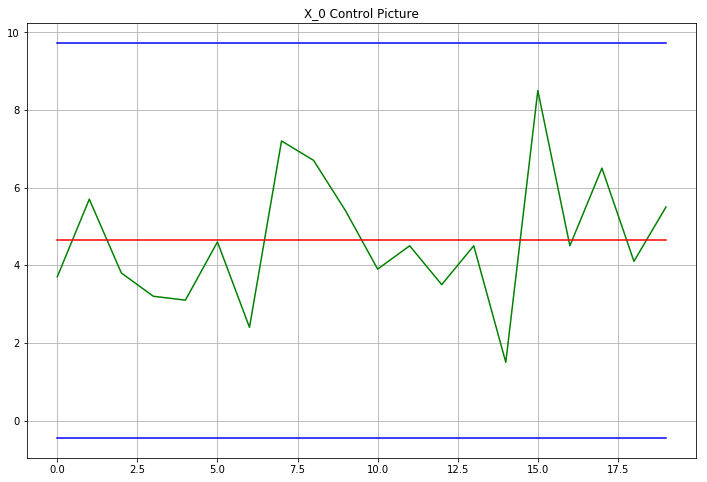

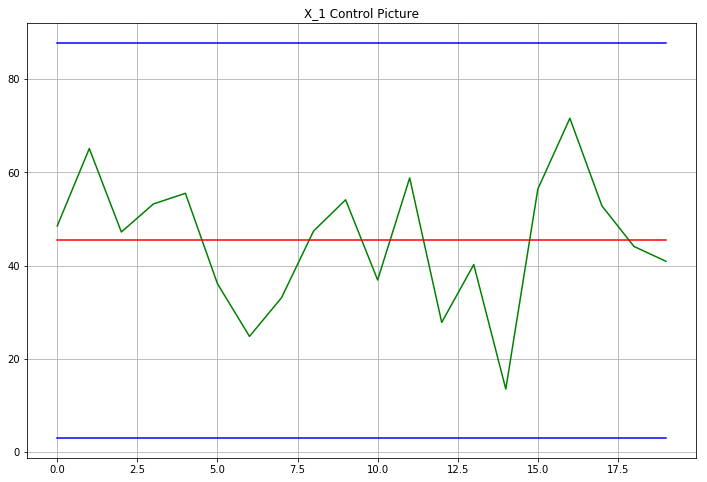

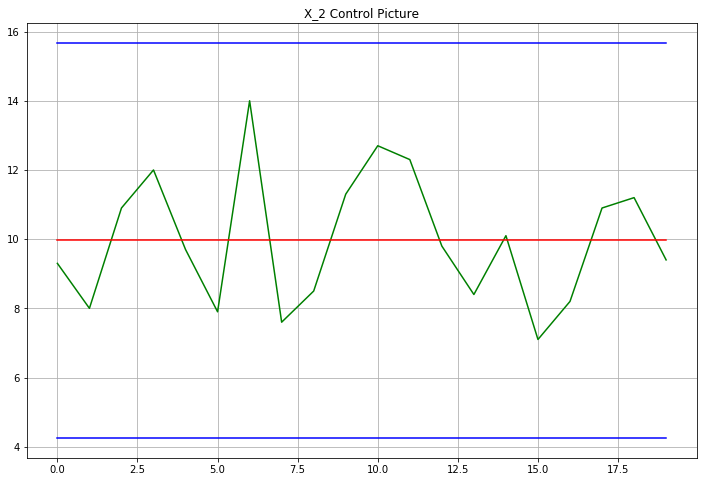

In [227]:
quality_control(X)

### 椭圆控制图
上文介绍的是一元变量的控制图，下面介绍多元变量的介绍图，由于变量之间的相关性，因此需要同时展示连个以上变量的控制图，最常用的方法是
椭圆控制图和$T^2$控制图,椭圆控制图仅限于两个变量，若将第ｊ个单元的两个特征画作$(x_{j1},x_{j2})$,则95%置信椭圆满足如下不等式ｘ构成
$$(x-\overline{x})^{'}S^{-1}(x-\overline{x}) \leq \chi_2^2(0.05)$$


In [2]:
X = np.array([
    [3387,3109,2670,3125,3469,3120,3671,4531,3678, 3238, 3135,5217,3728,3506, 3824,3516], 
    [2200,875,957,1758,868,398,1603,532,2034,1136,5326,1658,1945,344,807,1223]]).T
    

In [117]:
def ellipse_control(X, alpha):
    n,p = X.shape
    if p > 2:
        p = 2
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1])))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)

    c = stats.chi2.isf(alpha, 2)
    a = S[0,0]*S[1,1]/(S[0,0]*S[1,1]-S[0,1]*S[0,1]) 
    start= x_[1] - 5*np.sqrt(S[1,1])
    end = x_[1] + 5*np.sqrt(S[1,1])
    xl1,yl1,xl2 = [],[],[]
    for y in np.linspace(start,end,500):
        x = sympy.Symbol('x')
        b = sympy.solve((x-x_[0])*(x-x_[0])/S[0,0] - 2*S[0,1]*(x-x_[0])*(y-x_[1])/(S[0,0]*S[1,1]) + (y-x_[1])*(y-x_[1])/S[1,1]-c/a,x)
        if len(b) > 0 and isinstance(b[0], Float):
            yl1.append(y)
            xl1.append(b[0])
            xl2.append(b[1])
    plt.figure(figsize=(12,8))
    plt.plot(xl1,yl1, '.',color='g',)
    plt.plot(xl2,yl1, '.',color='g',)
    plt.plot(X[:,0],X[:,1],'o', color='r')

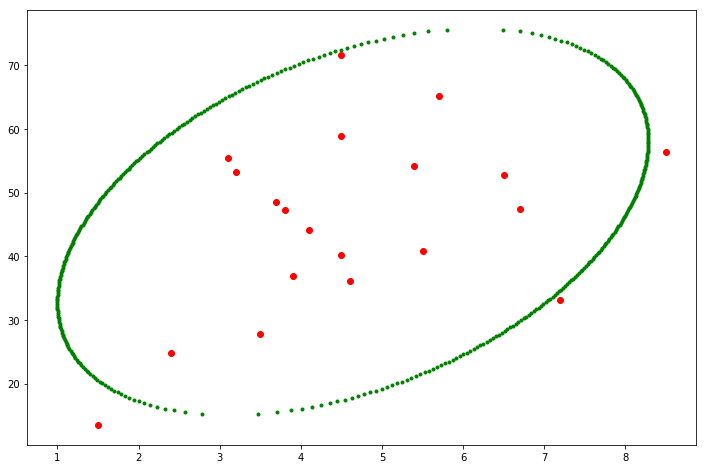

In [119]:
ellipse_control(X, 0.10)

### $T^2$控制图
对于两个以上目标，需要使用$T^2$控制图。与散点图不同，它的点是按照时间顺序给出的，对于第ｊ个点计算$T^2$统计量
$$T_j^2=(x_j-\overline{x})^{'}S^{-1}(x_j-\overline{x})$$
然后将$T^2$值画在时间轴上，控制下限为０，控制上限$UCL=\chi_p^2(0.05)$

In [136]:
def T_squre_control(X, alpha):
    n,p = X.shape
    x_ = np.array(list(map(lambda x:reduce(add, X[:,x])/n, range(X.shape[1])))) #椭球中心
    S = np.eye(p)
    for i in range(p):
        for j in range(p):
            if i == j:
                S[i, j] = reduce(add, map(lambda x: pow(x-x_[i], 2), X[:,i]))/(n-1)
            else:
                S[i, j] = reduce(add, map(lambda x: (x[0]-x_[i])*(x[1]-x_[j]), zip(X[:,i], X[:,j])))/(n-1)    
    S_r = np.linalg.inv(S)  
    T = list(map(lambda x:(x - x_).dot(S_r).dot(x.T - x_.T), map(lambda k:X[k,:],range(n))))
    c = stats.chi2.isf(alpha, p)
    plt.figure(figsize=(12,8))
    plt.plot(list(range(n)),T, '.',color='g',)
    plt.plot([0,n],[c, c],'-', color='r',label=f"{100*(1-alpha)}%")
    plt.legend()
    

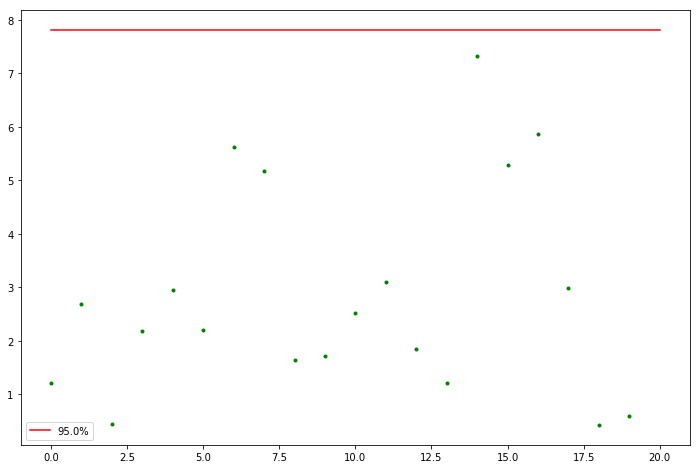

In [140]:
T_squre_control(X, 0.05)